In [8]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline
plt.style.use('seaborn')
pd.set_option('display.max_rows', 100)
    
root_path = '/home/lucas/projects/mmml-alzheimer-diagnosis/'
data_path = '/home/lucas/projects/mmml-alzheimer-diagnosis/data/'

os.chdir('/home/lucas/projects/mmml-alzheimer-diagnosis/src/model_training/')
from ensemble_train import prepare_mri_predictions

os.chdir('/home/lucas/projects/mmml-alzheimer-diagnosis/src/model_evaluation/')
from ensemble_evaluation import calculate_rocs_on_datasets,calculate_metrics_on_datasets
from base_evaluation import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:

def datasets_sizes(df,datasets,label='MACRO_GROUP'):

    df_size = pd.DataFrame(columns=['Set','Total Samples','Positive Samples','Negative Samples','Positive Percentage'])
    df_size['Set'] = ['Train','Validation','Test','TOTAL']

    df_size.loc[df_size['Set'] == 'Train','Total Samples'] = datasets[0].shape[0]
    df_size.loc[df_size['Set'] == 'Validation','Total Samples'] = datasets[1].shape[0]
    df_size.loc[df_size['Set'] == 'Test','Total Samples'] = datasets[2].shape[0]
    df_size.loc[df_size['Set'] == 'TOTAL','Total Samples'] = df.shape[0]

    df_size.loc[df_size['Set'] == 'Train','Negative Samples'] = datasets[0].query(f"{label} == 0").shape[0]
    df_size.loc[df_size['Set'] == 'Train','Positive Samples'] = datasets[0].query(f"{label} == 1").shape[0]
    df_size.loc[df_size['Set'] == 'Validation','Negative Samples'] = datasets[1].query(f"{label} == 0").shape[0]
    df_size.loc[df_size['Set'] == 'Validation','Positive Samples'] = datasets[1].query(f"{label} == 1").shape[0]
    df_size.loc[df_size['Set'] == 'Test','Negative Samples'] = datasets[2].query(f"{label} == 0").shape[0]
    df_size.loc[df_size['Set'] == 'Test','Positive Samples'] = datasets[2].query(f"{label} == 1").shape[0]
    df_size.loc[df_size['Set'] == 'TOTAL','Negative Samples'] = df.query(f"{label} == 0").shape[0]
    df_size.loc[df_size['Set'] == 'TOTAL','Positive Samples'] = df.query(f"{label} == 1").shape[0]

    df_size['Positive Percentage'] = df_size['Positive Samples'] / df_size['Total Samples']
    df_size['Positive Percentage'] = np.ceil(1000*df_size['Positive Percentage']) / 10
    return df_size



# Ensemble Learning Training Results

## AD x CN

In [10]:
df_preds = pd.read_csv(data_path+'PREDICTIONS_AD_ALL_SCORES_ENSEMBLE.csv')
datasets = [df_preds.query("DATASET in ('train','train_cnn')"),
            df_preds.query("DATASET == 'validation'"),
            df_preds.query("DATASET == 'test'")]

### Dataset size

In [12]:
df_size = datasets_sizes(df_preds,datasets,label='DIAGNOSIS')
print("Preprocessed MRI dataset - AD x CN:")
df_size

Preprocessed MRI dataset - AD x CN:


,Set,Total Samples,Positive Samples,Negative Samples,Positive Percentage
0,Train,709,155,554,21.9
1,Validation,346,73,273,21.1
2,Test,348,65,283,18.7
3,TOTAL,1403,293,1110,20.9


### ROC Curves

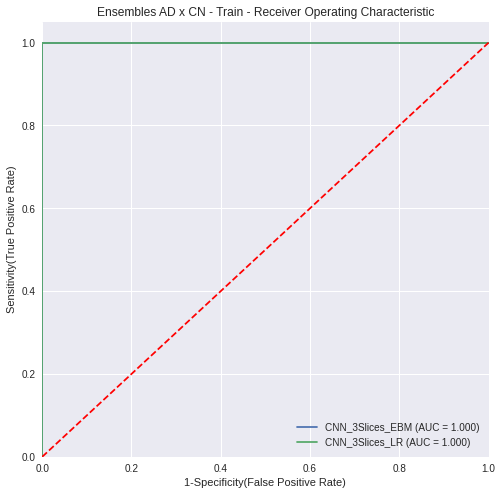

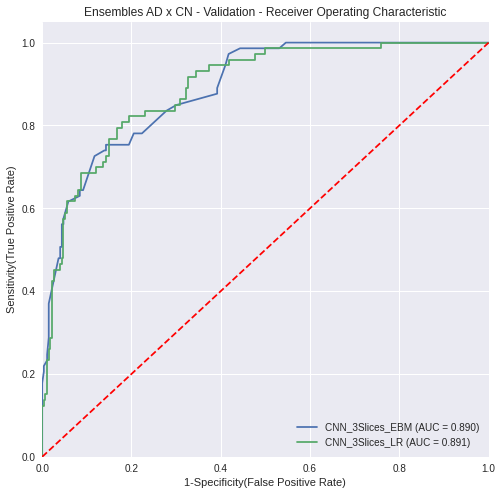

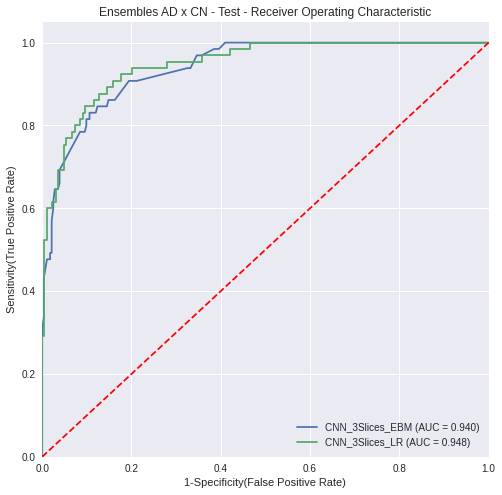

,index,SensLevel_at_0.75,SensLevel_at_0.9,AUC,AUC_CI_low,AUC_CI_high,Std_Error,Optimal_Sen,Sen_CI_low,Sen_CI_high,Optimal_Spe,Spe_CI_low,Spe_CI_high,Model,Optimal_Thresh,set
0,CNN_3Slices_EBM,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,CNN_3Slices_EBM,0.999761,Train
1,CNN_3Slices_LR,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,CNN_3Slices_LR,0.945592,Train
2,CNN_3Slices_EBM,0.8073059360730593,0.6708414872798434,0.889708,0.83895,0.940467,0.025898,0.753425,0.654549,0.8523,0.857143,0.815633,0.898653,CNN_3Slices_EBM,0.014111,Validation
3,CNN_3Slices_LR,0.8356164383561644,0.684931506849315,0.890812,0.840273,0.941352,0.025786,0.808219,0.717904,0.898535,0.820513,0.774989,0.866036,CNN_3Slices_LR,0.076789,Validation
4,CNN_3Slices_EBM,0.9180288461538462,0.8153846153846154,0.940391,0.899726,0.981057,0.020748,0.846154,0.75844,0.933868,0.876325,0.837969,0.914681,CNN_3Slices_EBM,0.014111,Test
5,CNN_3Slices_LR,0.9384615384615385,0.8461538461538461,0.94754,0.909229,0.985851,0.019547,0.876923,0.797056,0.95679,0.872792,0.83397,0.911613,CNN_3Slices_LR,0.076789,Test


In [31]:
models = ['CNN_3Slices_EBM', 'CNN_3Slices_LR']
df_rocs = calculate_rocs_on_datasets(models = models,datasets=datasets,label ='DIAGNOSIS',roc_title_prefix='Ensembles AD x CN - ')
df_rocs

In [32]:
check_auc_difference(models,datasets,label='DIAGNOSIS',alpha=0.05)

Comparing AUCs between CNN_3Slices_EBM and CNN_3Slices_LR:
set: Validation
 p-value = 0.9046
 Cannot reject null hypothesis. AUCs are statistically the same.

set: Test
 p-value = 0.3593
 Cannot reject null hypothesis. AUCs are statistically the same.

------------------------------------------


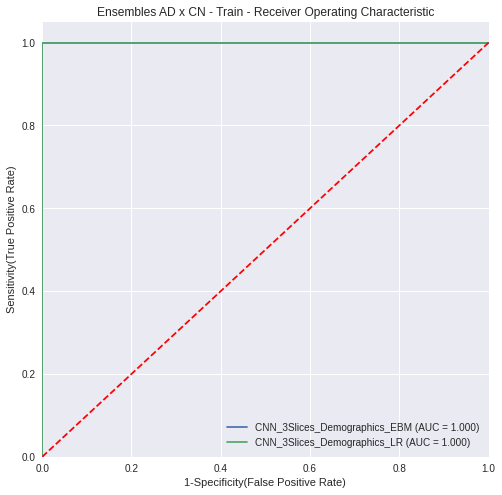

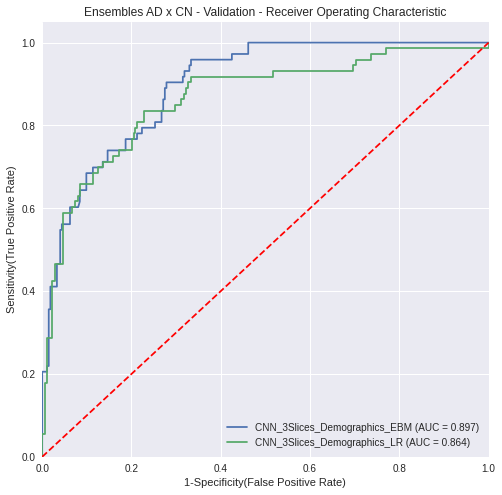

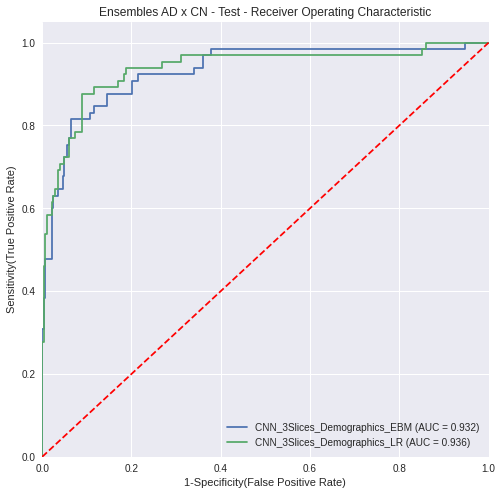

,index,SensLevel_at_0.75,SensLevel_at_0.9,AUC,AUC_CI_low,AUC_CI_high,Std_Error,Optimal_Sen,Sen_CI_low,Sen_CI_high,Optimal_Spe,Spe_CI_low,Spe_CI_high,Model,Optimal_Thresh,set
0,CNN_3Slices_Demographics_EBM,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,CNN_3Slices_Demographics_EBM,0.999982,Train
1,CNN_3Slices_Demographics_LR,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,CNN_3Slices_Demographics_LR,0.952519,Train
2,CNN_3Slices_Demographics_EBM,0.7945205479452054,0.684931506849315,0.896758,0.847433,0.946084,0.025167,0.90411,0.836565,0.971655,0.721612,0.668444,0.77478,CNN_3Slices_Demographics_EBM,0.000005,Validation
3,CNN_3Slices_Demographics_LR,0.8356164383561644,0.6575342465753424,0.864268,0.808874,0.919662,0.028263,0.835616,0.750595,0.920638,0.772894,0.723195,0.822593,CNN_3Slices_Demographics_LR,0.048659,Validation
4,CNN_3Slices_Demographics_EBM,0.9230769230769231,0.8153846153846154,0.931775,0.888494,0.975056,0.022083,0.876923,0.797056,0.95679,0.855124,0.814115,0.896132,CNN_3Slices_Demographics_EBM,0.000005,Test
5,CNN_3Slices_Demographics_LR,0.9384615384615385,0.8769230769230769,0.93645,0.89456,0.97834,0.021373,0.876923,0.797056,0.95679,0.911661,0.878597,0.944725,CNN_3Slices_Demographics_LR,0.048659,Test


In [33]:
models = ['CNN_3Slices_Demographics_EBM',
       'CNN_3Slices_Demographics_LR']
df_rocs = calculate_rocs_on_datasets(models = models,datasets=datasets,label ='DIAGNOSIS',roc_title_prefix='Ensembles AD x CN - ')
df_rocs

In [34]:
check_auc_difference(models,datasets,label='DIAGNOSIS',alpha=0.05)

Comparing AUCs between CNN_3Slices_Demographics_EBM and CNN_3Slices_Demographics_LR:
set: Validation
 p-value = 0.0369
 Refect null hypothesis: AUCs are statistically different with 95% confidence.

set: Test
 p-value = 0.7717
 Cannot reject null hypothesis. AUCs are statistically the same.

------------------------------------------


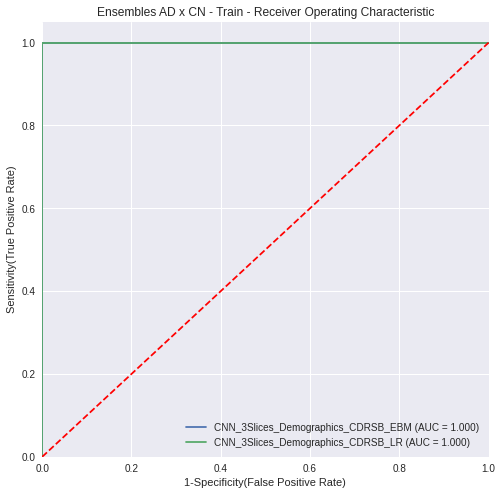

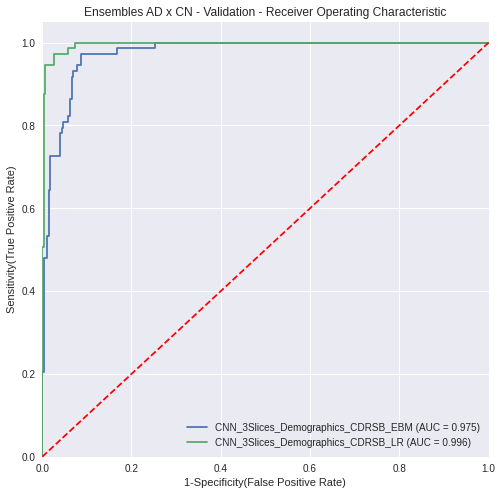

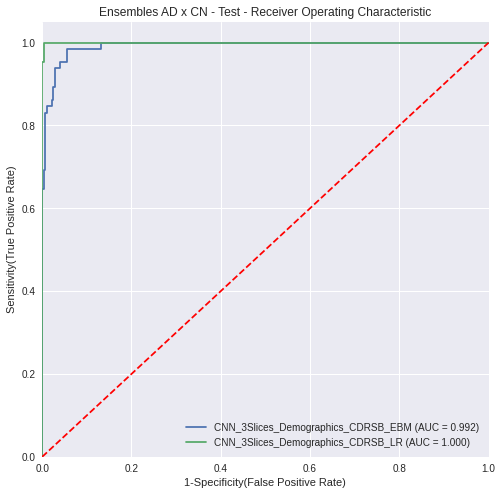

,index,SensLevel_at_0.75,SensLevel_at_0.9,AUC,AUC_CI_low,AUC_CI_high,Std_Error,Optimal_Sen,Sen_CI_low,Sen_CI_high,Optimal_Spe,Spe_CI_low,Spe_CI_high,Model,Optimal_Thresh,set
0,CNN_3Slices_Demographics_CDRSB_EBM,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,CNN_3Slices_Demographics_CDRSB_EBM,0.999996,Train
1,CNN_3Slices_Demographics_CDRSB_LR,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,CNN_3Slices_Demographics_CDRSB_LR,0.745986,Train
2,CNN_3Slices_Demographics_CDRSB_EBM,0.9863013698630136,0.9726027397260274,0.97466,0.949118,1.000202,0.013032,0.972603,0.935156,1.01005,0.912088,0.878497,0.945678,CNN_3Slices_Demographics_CDRSB_EBM,0.000240,Validation
3,CNN_3Slices_Demographics_CDRSB_LR,1.0,1.0,0.995635,0.98492,1.006349,0.005466,0.972603,0.935156,1.01005,0.974359,0.955609,0.993109,CNN_3Slices_Demographics_CDRSB_LR,0.067229,Validation
4,CNN_3Slices_Demographics_CDRSB_EBM,1.0,0.9846153846153847,0.991954,0.976574,1.007335,0.007847,0.984615,0.954694,1.014536,0.943463,0.916554,0.970372,CNN_3Slices_Demographics_CDRSB_EBM,0.000240,Test
5,CNN_3Slices_Demographics_CDRSB_LR,1.0,1.0,0.999837,0.997638,1.002036,0.001122,1.0,1.0,1.0,0.996466,0.989553,1.00338,CNN_3Slices_Demographics_CDRSB_LR,0.067229,Test


In [35]:
models = ['CNN_3Slices_Demographics_CDRSB_EBM',
       'CNN_3Slices_Demographics_CDRSB_LR']
df_rocs = calculate_rocs_on_datasets(models = models,datasets=datasets,label ='DIAGNOSIS',roc_title_prefix='Ensembles AD x CN - ')
df_rocs

In [36]:
check_auc_difference(models,datasets,label='DIAGNOSIS',alpha=0.05)

Comparing AUCs between CNN_3Slices_Demographics_CDRSB_EBM and CNN_3Slices_Demographics_CDRSB_LR:
set: Validation
 p-value = 0.0001
 Refect null hypothesis: AUCs are statistically different with 95% confidence.

set: Test
 p-value = 0.0153
 Refect null hypothesis: AUCs are statistically different with 95% confidence.

------------------------------------------


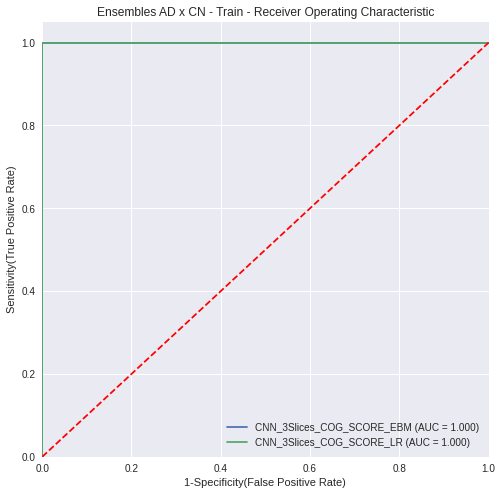

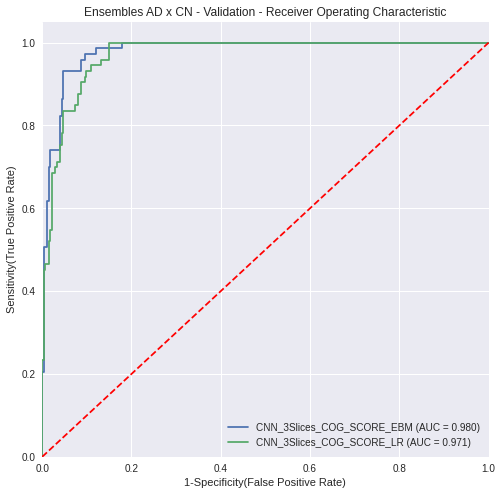

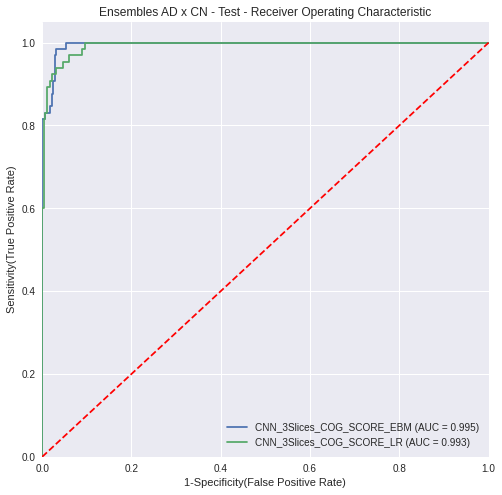

,index,SensLevel_at_0.75,SensLevel_at_0.9,AUC,AUC_CI_low,AUC_CI_high,Std_Error,Optimal_Sen,Sen_CI_low,Sen_CI_high,Optimal_Spe,Spe_CI_low,Spe_CI_high,Model,Optimal_Thresh,set
0,CNN_3Slices_COG_SCORE_EBM,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,CNN_3Slices_COG_SCORE_EBM,0.999980,Train
1,CNN_3Slices_COG_SCORE_LR,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,CNN_3Slices_COG_SCORE_LR,0.952712,Train
2,CNN_3Slices_COG_SCORE_EBM,1.0,0.9726027397260274,0.979527,0.956512,1.002543,0.011743,0.931507,0.873562,0.989451,0.952381,0.927119,0.977643,CNN_3Slices_COG_SCORE_EBM,0.004938,Validation
3,CNN_3Slices_COG_SCORE_LR,1.0,0.9315068493150684,0.970696,0.943286,0.998106,0.013985,0.931507,0.873562,0.989451,0.901099,0.865686,0.936512,CNN_3Slices_COG_SCORE_LR,0.060655,Validation
4,CNN_3Slices_COG_SCORE_EBM,1.0,1.0,0.995162,0.983214,1.007109,0.006096,0.984615,0.954694,1.014536,0.968198,0.947754,0.988642,CNN_3Slices_COG_SCORE_EBM,0.004938,Test
5,CNN_3Slices_COG_SCORE_LR,1.0,1.0,0.992933,0.97851,1.007356,0.007359,0.953846,0.902838,1.004855,0.954064,0.929673,0.978455,CNN_3Slices_COG_SCORE_LR,0.060655,Test


In [37]:
models = ['CNN_3Slices_COG_SCORE_EBM', 'CNN_3Slices_COG_SCORE_LR']
df_rocs = calculate_rocs_on_datasets(models = models,datasets=datasets,label ='DIAGNOSIS',roc_title_prefix='Ensembles AD x CN - ')
df_rocs

In [38]:
check_auc_difference(models,datasets,label='DIAGNOSIS',alpha=0.05)

Comparing AUCs between CNN_3Slices_COG_SCORE_EBM and CNN_3Slices_COG_SCORE_LR:
set: Validation
 p-value = 0.0249
 Refect null hypothesis: AUCs are statistically different with 95% confidence.

set: Test
 p-value = 0.2697
 Cannot reject null hypothesis. AUCs are statistically the same.

------------------------------------------


### ROC Curves Comparing all Ensemble Experiments with Best Results

Each ensemble was based on the higher AUC in Validation, regardless if there was a statistical significance.

In [37]:
ensemble_experiments_best = ['CNN_3Slices_COG_SCORE','CNN_3Slices', 'CNN_3Slices_Demographics','CNN_3Slices_Demographics_CDRSB','CDRSB']
all_best_experiments = ['CNN_SCORE_AXIAL_23','CNN_SCORE_CORONAL_43', 'CNN_SCORE_SAGITTAL_26', 'COGTEST_SCORE'] + ensemble_experiments_best

In [49]:
# models = ensemble_experiments_best
# df_rocs = calculate_rocs_on_datasets(models = models,datasets=datasets,label ='DIAGNOSIS',roc_title_prefix='Ensembles AD x CN - ')
# df_rocs

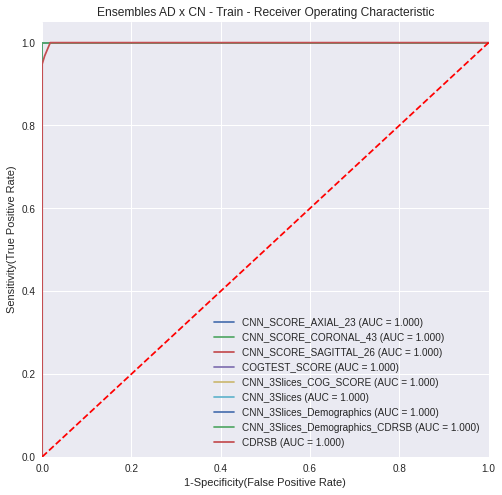

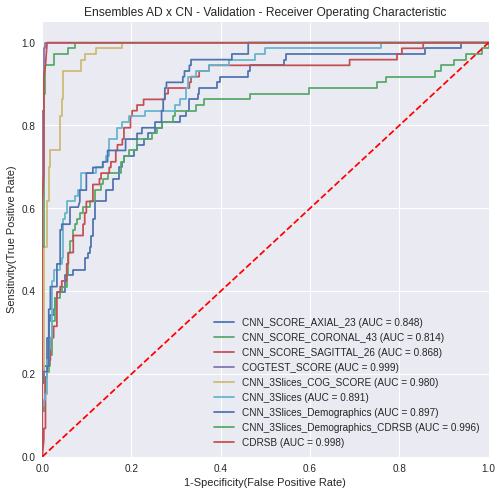

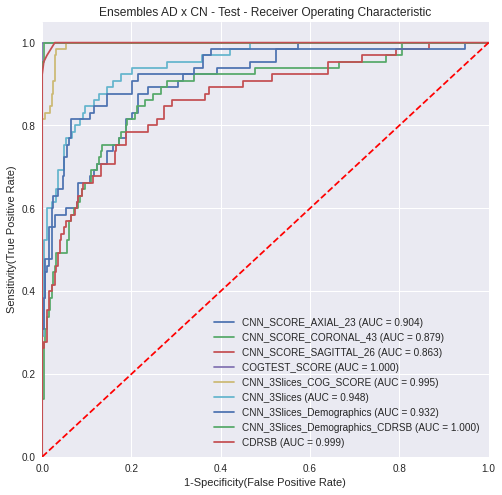

,index,SensLevel_at_0.75,SensLevel_at_0.9,AUC,AUC_CI_low,AUC_CI_high,Std_Error,Optimal_Sen,Sen_CI_low,Sen_CI_high,Optimal_Spe,Spe_CI_low,Spe_CI_high,Model,Optimal_Thresh,set
0,CNN_SCORE_AXIAL_23,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,CNN_SCORE_AXIAL_23,0.655753,Train
1,CNN_SCORE_CORONAL_43,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,CNN_SCORE_CORONAL_43,0.997879,Train
2,CNN_SCORE_SAGITTAL_26,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,CNN_SCORE_SAGITTAL_26,0.999764,Train
3,COGTEST_SCORE,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,COGTEST_SCORE,0.508446,Train
4,CNN_3Slices_COG_SCORE,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,CNN_3Slices_COG_SCORE,0.999980,Train
5,CNN_3Slices,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,CNN_3Slices,0.945592,Train
6,CNN_3Slices_Demographics,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,CNN_3Slices_Demographics,0.999982,Train
7,CNN_3Slices_Demographics_CDRSB,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,CNN_3Slices_Demographics_CDRSB,0.745986,Train
8,CDRSB,1.0,1.0,0.999569,0.997257,1.001881,0.00118,1.0,1.0,1.0,0.981949,0.970863,0.993036,CDRSB,1.500000,Train
9,CNN_SCORE_AXIAL_23,0.7808219178082192,0.4794520547945205,0.848211,0.790261,0.906162,0.029567,0.780822,0.685921,0.875723,0.761905,0.71138,0.812429,CNN_SCORE_AXIAL_23,0.003795,Validation


In [50]:
models = all_best_experiments
df_rocs = calculate_rocs_on_datasets(models = models,datasets=datasets,label ='DIAGNOSIS',roc_title_prefix='Ensembles AD x CN - ')
df_rocs

In [51]:
df_pvalues = check_auc_difference(models,datasets,label='DIAGNOSIS',alpha=0.05,verbose=0)
df_pvalues

,CNN_SCORE_AXIAL_23,CNN_SCORE_CORONAL_43,CNN_SCORE_SAGITTAL_26,COGTEST_SCORE,CNN_3Slices_COG_SCORE,CNN_3Slices,CNN_3Slices_Demographics,CNN_3Slices_Demographics_CDRSB,CDRSB
CNN_SCORE_AXIAL_23,NaN,0.4137,0.2094,0.0,0.0,0.0141,0.1717,0.0,0.0
CNN_SCORE_CORONAL_43,0.4137,NaN,0.6458,0.0,0.0,0.0013,0.0215,0.0,0.0
CNN_SCORE_SAGITTAL_26,0.2094,0.6458,NaN,0.0,0.0,0.0013,0.0158,0.0,0.0
COGTEST_SCORE,0.0,0.0,0.0,NaN,0.0209,0.0001,0.0003,0.3846,0.1528
CNN_3Slices_COG_SCORE,0.0,0.0,0.0,0.0209,NaN,0.0001,0.0003,0.0256,0.0609
CNN_3Slices,0.0141,0.0013,0.0013,0.0001,0.0001,NaN,0.1604,0.0001,0.0001
CNN_3Slices_Demographics,0.1717,0.0215,0.0158,0.0003,0.0003,0.1604,NaN,0.0004,0.0004
CNN_3Slices_Demographics_CDRSB,0.0,0.0,0.0,0.3846,0.0256,0.0001,0.0004,NaN,0.1888
CDRSB,0.0,0.0,0.0,0.1528,0.0609,0.0001,0.0004,0.1888,NaN


### Metrics table

In [55]:
df_result_metrics = calculate_metrics_on_datasets(models=ensemble_experiments_best,datasets = datasets,df_rocs=df_rocs,label='DIAGNOSIS',verbose=0)
df_test = df_result_metrics.query("Set == 'Test'").drop(["Conf_Mat",'Set'],axis=1)
df_test

,Model,Auc,F1Score,Accuracy,Precision,Recall,Prediction_Threshold
10,CNN_3Slices_COG_SCORE,0.995,0.926,0.971,0.887,0.969,0.005
11,CNN_3Slices,0.948,0.713,0.871,0.609,0.862,0.077
12,CNN_3Slices_Demographics,0.932,0.632,0.799,0.480,0.923,0.000
13,CNN_3Slices_Demographics_CDRSB,1.000,0.970,0.989,0.942,1.000,0.067
14,CDRSB,0.999,0.962,0.986,0.955,0.969,1.500


In [57]:
df_all_metrics = pd.pivot_table(data=df_result_metrics.drop(['Conf_Mat'],axis=1),index=['Model','Set'])
df_all_metrics = df_all_metrics.sort_index(key=lambda x: x.map({
                                                'CNN_3Slices':0,
                                                'CNN_3Slices_COG_SCORE':1,
                                                'CNN_3Slices_Demographics':2,
                                                'CNN_3Slices_Demographics_CDRSB':3,
                                                'CDRSB':4,
                                                'Train':0,
                                                'Validation':1}))
df_all_metrics

Accuracy    Auc  F1Score  \
Model                          Set                                    
CNN_3Slices                    Train          1.000  1.000    1.000   
                               Validation     0.818  0.891    0.652   
                               Test           0.871  0.948    0.713   
CNN_3Slices_COG_SCORE          Train          1.000  1.000    1.000   
                               Validation     0.948  0.980    0.883   
                               Test           0.971  0.995    0.926   
CNN_3Slices_Demographics       Train          1.000  1.000    1.000   
                               Validation     0.760  0.897    0.614   
                               Test           0.799  0.932    0.632   
CNN_3Slices_Demographics_CDRSB Train          1.000  1.000    1.000   
                               Validation     0.974  0.996    0.940   
                               Test           0.989  1.000    0.970   
CDRSB                          Train          0.986  1.000    0.969   
                               Validation     0.991  0.998    0.980   
                               Test           0.986  0.999    0.962   

                                           Precision  Prediction_Threshold  \
Model                          Set                                           
CNN_3Slices                    Train           1.000                 0.946   
                               Validation      0.546                 0.077   
                               Test            0.609                 0.077   
CNN_3Slices_COG_SCORE          Train           1.000                 1.000   
                               Validation      0.840                 0.005   
                               Test            0.887                 0.005   
CNN_3Slices_Demographics       Train           1.000                 1.000   
                               Validation      0.465                 0.000   
                               Test            0.480                 0.000   
CNN_3Slices_Demographics_CDRSB Train           1.000                 0.746   
                               Validation      0.910                 0.067   
                               Test            0.942                 0.067   
CDRSB                          Train           0.939                 1.500   
                               Validation      0.961                 1.500   
                               Test            0.955                 1.500   

                                           Recall  
Model                          Set                 
CNN_3Slices                    Train        1.000  
                               Validation   0.808  
                               Test         0.862  
CNN_3Slices_COG_SCORE          Train        1.000  
                               Validation   0.932  
                               Test         0.969  
CNN_3Slices_Demographics       Train        1.000  
                               Validation   0.904  
                               Test         0.923  
CNN_3Slices_Demographics_CDRSB Train        1.000  
                               Validation   0.973  
                               Test         1.000  
CDRSB                          Train        1.000  
                               Validation   1.000  
                               Test         0.969

### Comparing AUCs between all experiments

In [72]:
df_test

,Model,Auc,F1Score,Accuracy,Precision,Recall,Prediction_Threshold
18,CNN_SCORE_AXIAL_23,0.904,0.595,0.805,0.485,0.769,0.004
19,CNN_SCORE_CORONAL_43,0.879,0.609,0.819,0.510,0.754,0.164
20,CNN_SCORE_SAGITTAL_26,0.863,0.580,0.787,0.459,0.785,0.002
21,COGTEST_SCORE,1.000,0.984,0.994,1.000,0.969,0.620
22,CNN_3Slices_COG_SCORE,0.995,0.926,0.971,0.887,0.969,0.005
23,CNN_3Slices,0.948,0.713,0.871,0.609,0.862,0.077
24,CNN_3Slices_Demographics,0.932,0.632,0.799,0.480,0.923,0.000
25,CNN_3Slices_Demographics_CDRSB,1.000,0.970,0.989,0.942,1.000,0.067
26,CDRSB,0.999,0.962,0.986,0.955,0.969,1.500


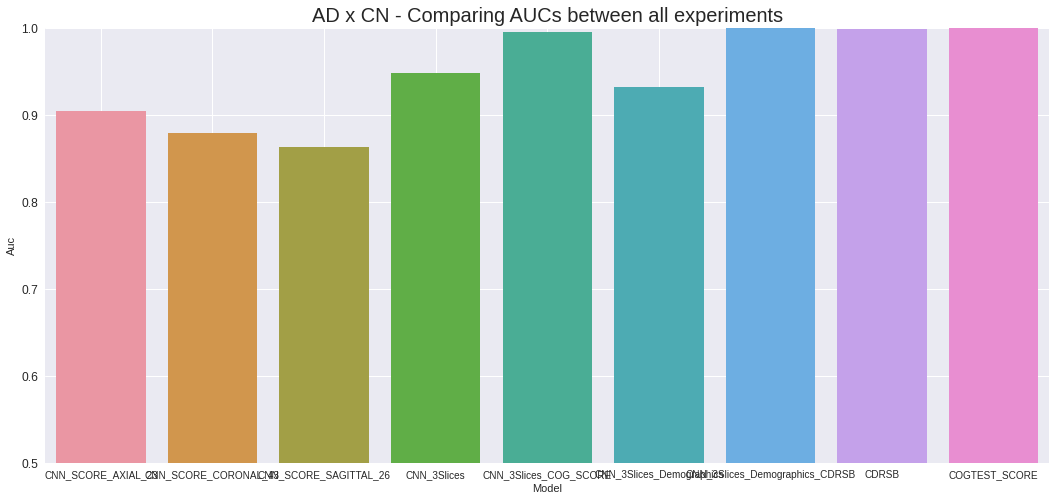

In [81]:
df_result_metrics = calculate_metrics_on_datasets(models=all_best_experiments,datasets = datasets,df_rocs=df_rocs,label='DIAGNOSIS',verbose=0)
df_test = df_result_metrics.query("Set == 'Test'").drop(["Conf_Mat",'Set'],axis=1)

df_test = df_test.sort_values(by='Model',key=lambda x: x.map({
                                                'CNN_SCORE_AXIAL_23':0,
                                                'CNN_SCORE_CORONAL_43':1,
                                                'CNN_SCORE_SAGITTAL_26':2,
                                                'CNN_3Slices':3,
                                                'CNN_3Slices_COG_SCORE':4,
                                                'CNN_3Slices_Demographics':5,
                                                'CNN_3Slices_Demographics_CDRSB':6,
                                                'CDRSB':7
                                                }))

large_figure = (18,8)
plt.figure(figsize = large_figure)
sns.barplot(data=df_test,y='Auc',x='Model',palette=None)
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)
plt.ylim(0.5,1)
plt.grid(True)
plt.title("AD x CN - Comparing AUCs between all experiments",fontdict={'size':20})
plt.show()

### Comparing F1s between all experiments

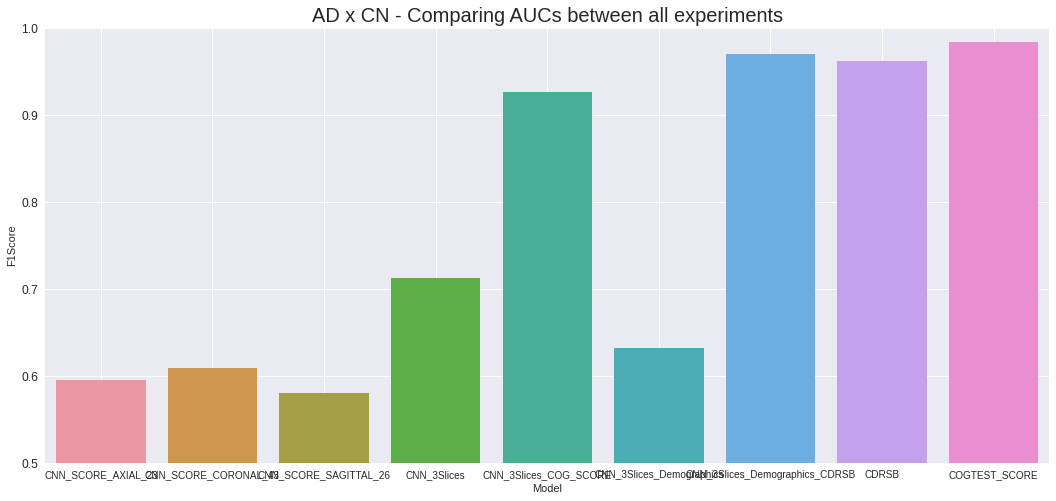

In [82]:
large_figure = (18,8)
plt.figure(figsize = large_figure)
sns.barplot(data=df_test,y='F1Score',x='Model',palette=None)
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)
plt.ylim(0.5,1)
plt.grid(True)
plt.title("AD x CN - Comparing AUCs between all experiments",fontdict={'size':20})
plt.show()

### Confusion Matrix

In [58]:
for i,item in df_result_metrics.iterrows():
    print(item['Model'] + ' - ' + item['Set'])
    print(pd.DataFrame(item['Conf_Mat']))
    print('---------------------------')

CNN_3Slices_COG_SCORE - Train
     0    1
0  554    0
1    0  155
---------------------------
CNN_3Slices - Train
     0    1
0  554    0
1    0  155
---------------------------
CNN_3Slices_Demographics - Train
     0    1
0  554    0
1    0  155
---------------------------
CNN_3Slices_Demographics_CDRSB - Train
     0    1
0  554    0
1    0  155
---------------------------
CDRSB - Train
     0    1
0  544   10
1    0  155
---------------------------
CNN_3Slices_COG_SCORE - Validation
     0   1
0  260  13
1    5  68
---------------------------
CNN_3Slices - Validation
     0   1
0  224  49
1   14  59
---------------------------
CNN_3Slices_Demographics - Validation
     0   1
0  197  76
1    7  66
---------------------------
CNN_3Slices_Demographics_CDRSB - Validation
     0   1
0  266   7
1    2  71
---------------------------
CDRSB - Validation
     0   1
0  270   3
1    0  73
---------------------------
CNN_3Slices_COG_SCORE - Test
     0   1
0  275   8
1    2  63
----------------

## MCI x CN

In [11]:
df_preds = pd.read_csv(data_path+'PREDICTIONS_MCI_VGG19_BN.csv')
imgs_coronal = df_preds.query("ORIENTATION in ('coronal')")['IMAGE_DATA_ID'].tolist()
imgs_axial = df_preds.query("ORIENTATION in ('axial')")['IMAGE_DATA_ID'].tolist()
imgs_sagittal = df_preds.query("ORIENTATION in ('sagittal')")['IMAGE_DATA_ID'].tolist()
axial_diffs = list(set(imgs_coronal) - set(imgs_axial))

other_missing_mris = ['I254766', 'I85612', 'I85589', 'I86179', 'I85699', 'I321306',
       'I82125', 'I119487', 'I223283', 'I296801', 'I148873', 'I47709',
       'I47859', 'I280596', 'I280591', 'I39736', 'I67743', 'I35815',
       'I267765', 'I63099', 'I63097', 'I63095', 'I133472', 'I312665',
       'I133486', 'I274525', 'I274523', 'I38658', 'I79913', 'I119133',
       'I236970', 'I95628', 'I200217', 'I46381', 'I293688', 'I52770']

df_mri = prepare_mri_predictions(data_path+'PREDICTIONS_MCI_VGG19_BN.csv').dropna()
datasets = [df_mri.query("DATASET in ('train','train_cnn')"),
            df_mri.query("DATASET == 'validation'"),
            df_mri.query("DATASET == 'test'")]
axial_diffs

['I274525', 'I274523', 'I293688', 'I280596', 'I223283']

In [12]:
# df_mri.query("DATASET == 'validation'").shape
prepare_mri_predictions(data_path+'PREDICTIONS_MCI_VGG19_BN.csv')\
    .query("IMAGE_DATA_ID in @axial_diffs")

,SUBJECT,IMAGE_DATA_ID,DATASET,MACRO_GROUP,CNN_SCORE_AXIAL_8,CNN_SCORE_CORONAL_70,CNN_SCORE_SAGITTAL_50
485,016_S_0359,I293688,validation,0,NaN,0.575252,0.611845
1400,067_S_0056,I274523,train_cnn,0,NaN,0.529465,0.604635
1407,067_S_0059,I274525,validation,0,NaN,0.532123,0.587051
1577,073_S_2153,I223283,train_cnn,1,NaN,0.529127,0.671789
2070,128_S_0863,I280596,validation,0,NaN,0.530115,0.610597


### Dataset size

In [13]:
df_size = datasets_sizes(df_mri,datasets)
print("Preprocessed MRI dataset - MCI x CN:")
df_size

Preprocessed MRI dataset - MCI x CN:


,Set,Total Samples,Positive Samples,Negative Samples,Positive Percentage
0,Train,1732,499,1233,28.9
1,Validation,355,82,273,23.1
2,Test,364,81,283,22.3
3,TOTAL,2451,662,1789,27.1


In [14]:
prepare_mri_predictions(data_path+'PREDICTIONS_MCI_VGG19_BN.csv').query("DATASET == 'validation'").shape

(358, 7)

### ROC Curves

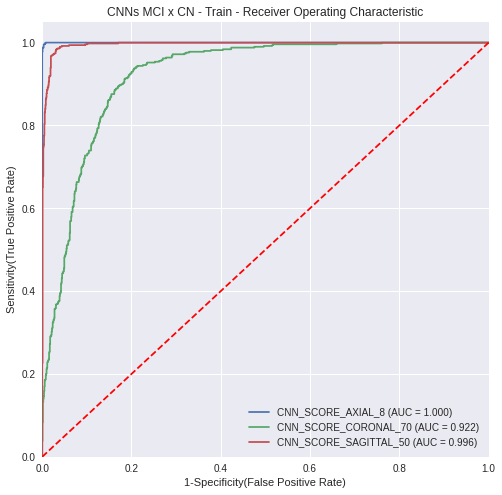

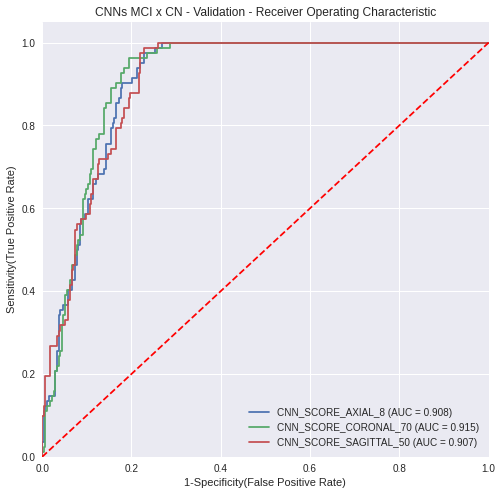

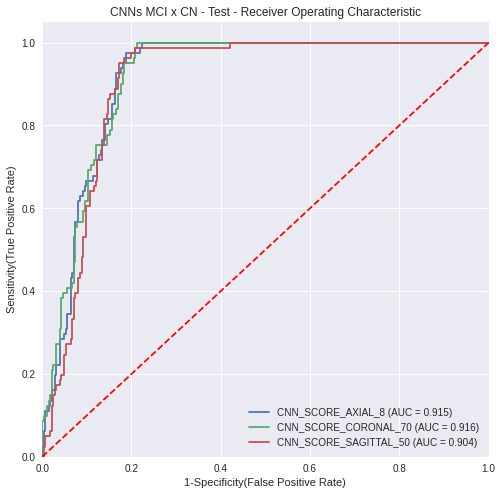

,index,SensLevel_at_0.75,SensLevel_at_0.9,AUC,AUC_CI_low,AUC_CI_high,Std_Error,Optimal_Sen,Sen_CI_low,Sen_CI_high,Optimal_Spe,Spe_CI_low,Spe_CI_high,Model,Optimal_Thresh,set
0,CNN_SCORE_AXIAL_8,1.0,1.0,0.999938,0.99945,1.000426,0.000249,0.995992,0.990448,1.001536,0.996756,0.993582,0.99993,CNN_SCORE_AXIAL_8,0.597011,Train
1,CNN_SCORE_CORONAL_70,0.9519038076152304,0.7274549098196392,0.921909,0.905107,0.938711,0.008573,0.885772,0.857862,0.913681,0.837794,0.817217,0.858371,CNN_SCORE_CORONAL_70,0.472682,Train
2,CNN_SCORE_SAGITTAL_50,1.0,0.9959919839679359,0.995545,0.991409,0.999681,0.00211,0.983968,0.972948,0.994988,0.96837,0.958601,0.978139,CNN_SCORE_SAGITTAL_50,0.516961,Train
3,CNN_SCORE_AXIAL_8,0.975609756097561,0.5853658536585366,0.907531,0.863072,0.951991,0.022684,0.902439,0.838215,0.966663,0.820513,0.774989,0.866036,CNN_SCORE_AXIAL_8,0.322333,Validation
4,CNN_SCORE_CORONAL_70,0.975609756097561,0.6463414634146342,0.914545,0.871633,0.957457,0.021894,0.890244,0.822586,0.957902,0.846154,0.803354,0.888954,CNN_SCORE_CORONAL_70,0.465799,Validation
5,CNN_SCORE_SAGITTAL_50,0.9878048780487805,0.5853658536585366,0.907397,0.862909,0.951886,0.022699,0.97561,0.942221,1.008998,0.78022,0.731098,0.829342,CNN_SCORE_SAGITTAL_50,0.265075,Validation
6,CNN_SCORE_AXIAL_8,1.0,0.6666666666666666,0.915282,0.872324,0.958239,0.021918,0.925926,0.868892,0.98296,0.833922,0.790563,0.877281,CNN_SCORE_AXIAL_8,0.322333,Test
7,CNN_SCORE_CORONAL_70,1.0,0.6172839506172839,0.915892,0.873075,0.95871,0.021846,0.950617,0.903432,0.997802,0.816254,0.771133,0.861376,CNN_SCORE_CORONAL_70,0.465799,Test
8,CNN_SCORE_SAGITTAL_50,0.9876543209876543,0.6049382716049383,0.903721,0.858235,0.949207,0.023208,0.950617,0.903432,0.997802,0.826855,0.782771,0.870939,CNN_SCORE_SAGITTAL_50,0.265075,Test


In [15]:
models = ['CNN_SCORE_AXIAL_8','CNN_SCORE_CORONAL_70', 'CNN_SCORE_SAGITTAL_50']
df_rocs = calculate_rocs_on_datasets(models = models,datasets=datasets,label ='MACRO_GROUP',roc_title_prefix='CNNs MCI x CN - ')
df_rocs

In [16]:
check_auc_difference(models,datasets,label='MACRO_GROUP',alpha=0.05)

Comparing AUCs between CNN_SCORE_AXIAL_8 and CNN_SCORE_CORONAL_70:
set: Validation
 p-value = 0.6375
 Cannot reject null hypothesis. AUCs are statistically the same.

set: Test
 p-value = 0.9638
 Cannot reject null hypothesis. AUCs are statistically the same.

------------------------------------------
Comparing AUCs between CNN_SCORE_AXIAL_8 and CNN_SCORE_SAGITTAL_50:
set: Validation
 p-value = 0.9922
 Cannot reject null hypothesis. AUCs are statistically the same.

set: Test
 p-value = 0.3733
 Cannot reject null hypothesis. AUCs are statistically the same.

------------------------------------------
Comparing AUCs between CNN_SCORE_CORONAL_70 and CNN_SCORE_SAGITTAL_50:
set: Validation
 p-value = 0.6298
 Cannot reject null hypothesis. AUCs are statistically the same.

set: Test
 p-value = 0.3954
 Cannot reject null hypothesis. AUCs are statistically the same.

------------------------------------------


### Metrics table

In [17]:
df_result_metrics = calculate_metrics_on_datasets(models=models,datasets = datasets,df_rocs=df_rocs,label='MACRO_GROUP',verbose=0)
df_test = df_result_metrics.query("Set == 'Test'").drop(["Conf_Mat",'Set'],axis=1)
df_test

,Model,Auc,F1Score,Accuracy,Precision,Recall,Prediction_Threshold
6,CNN_SCORE_AXIAL_8,0.915,0.708,0.843,0.605,0.852,0.322
7,CNN_SCORE_CORONAL_70,0.916,0.688,0.835,0.595,0.815,0.466
8,CNN_SCORE_SAGITTAL_50,0.904,0.732,0.843,0.591,0.963,0.265


In [18]:
df_all_metrics = pd.pivot_table(data=df_result_metrics.drop(['Conf_Mat'],axis=1),index=['Model','Set'])
df_all_metrics = df_all_metrics.sort_index(key=lambda x: x.map({'CNN_SCORE_AXIAL_8':0,'CNN_SCORE_CORONAL_70':1,'Train':0,'Validation':1}))
df_all_metrics

Accuracy    Auc  F1Score  Precision  \
Model                 Set                                               
CNN_SCORE_AXIAL_8     Train          0.997  1.000    0.994      0.992   
                      Validation     0.839  0.908    0.722      0.602   
                      Test           0.843  0.915    0.708      0.605   
CNN_SCORE_CORONAL_70  Train          0.852  0.922    0.775      0.688   
                      Validation     0.856  0.915    0.741      0.635   
                      Test           0.835  0.916    0.688      0.595   
CNN_SCORE_SAGITTAL_50 Train          0.973  0.996    0.954      0.926   
                      Validation     0.825  0.907    0.721      0.571   
                      Test           0.843  0.904    0.732      0.591   

                                  Prediction_Threshold  Recall  
Model                 Set                                       
CNN_SCORE_AXIAL_8     Train                      0.597   0.996  
                      Validation                 0.322   0.902  
                      Test                       0.322   0.852  
CNN_SCORE_CORONAL_70  Train                      0.473   0.886  
                      Validation                 0.466   0.890  
                      Test                       0.466   0.815  
CNN_SCORE_SAGITTAL_50 Train                      0.517   0.984  
                      Validation                 0.265   0.976  
                      Test                       0.265   0.963

### Confusion Matrix

In [19]:
for i,item in df_result_metrics.iterrows():
    print(item['Model'] + ' - ' + item['Set'])
    print(pd.DataFrame(item['Conf_Mat']))
    print('---------------------------')

CNN_SCORE_AXIAL_8 - Train
      0    1
0  1229    4
1     2  497
---------------------------
CNN_SCORE_CORONAL_70 - Train
      0    1
0  1033  200
1    57  442
---------------------------
CNN_SCORE_SAGITTAL_50 - Train
      0    1
0  1194   39
1     8  491
---------------------------
CNN_SCORE_AXIAL_8 - Validation
     0   1
0  224  49
1    8  74
---------------------------
CNN_SCORE_CORONAL_70 - Validation
     0   1
0  231  42
1    9  73
---------------------------
CNN_SCORE_SAGITTAL_50 - Validation
     0   1
0  213  60
1    2  80
---------------------------
CNN_SCORE_AXIAL_8 - Test
     0   1
0  238  45
1   12  69
---------------------------
CNN_SCORE_CORONAL_70 - Test
     0   1
0  238  45
1   15  66
---------------------------
CNN_SCORE_SAGITTAL_50 - Test
     0   1
0  229  54
1    3  78
---------------------------


In [25]:
df_preds = pd.read_csv(data_path+'PREDICTIONS_AD_COG_TESTS.csv')[['SUBJECT','IMAGE_DATA_ID','DATASET','DIAGNOSIS','COGTEST_SCORE_EBM','COGTEST_SCORE_LR']]
df_preds['DATASET'].fillna('train_cog_tests',inplace=True)
datasets = [df_preds.query("DATASET in ('train','train_cog_tests')"),
            df_preds.query("DATASET == 'validation'"),
            df_preds.query("DATASET == 'test'")]

### Dataset size

In [26]:
df_size = datasets_sizes(df_preds,datasets,label='DIAGNOSIS')
print("Preprocessed Cog Tests dataset - AD x CN:")
df_size

Preprocessed Cog Tests dataset - AD x CN:


,Set,Total Samples,Positive Samples,Negative Samples,Positive Percentage
0,Train,2614,759,1855,29.1
1,Validation,346,73,273,21.1
2,Test,348,65,283,18.7
3,TOTAL,3308,897,2411,27.2


### ROC Curves

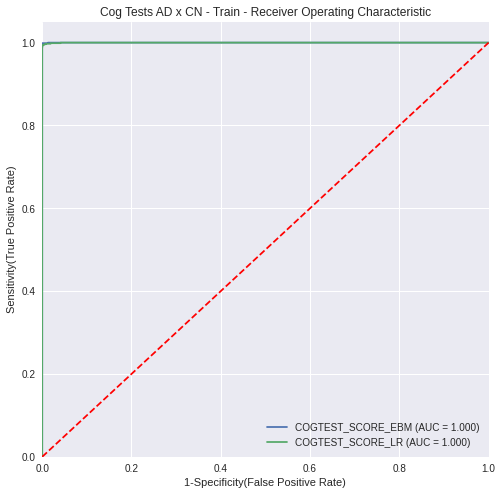

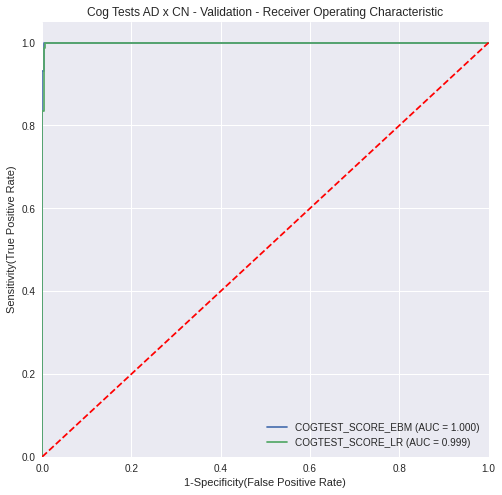

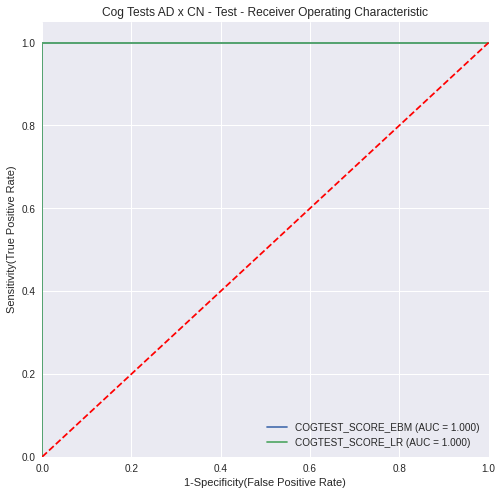

,index,SensLevel_at_0.75,SensLevel_at_0.9,AUC,AUC_CI_low,AUC_CI_high,Std_Error,Optimal_Sen,Sen_CI_low,Sen_CI_high,Optimal_Spe,Spe_CI_low,Spe_CI_high,Model,Optimal_Thresh,set
0,COGTEST_SCORE_EBM,1.0,1.0,0.999982,0.99977,1.000194,0.000108,0.998682,0.996102,1.001263,0.999461,0.998405,1.000517,COGTEST_SCORE_EBM,0.202838,Train
1,COGTEST_SCORE_LR,1.0,1.0,0.9999,0.999396,1.000403,0.000257,0.99473,0.989579,0.999881,0.997844,0.995733,0.999955,COGTEST_SCORE_LR,0.356785,Train
2,COGTEST_SCORE_EBM,1.0,1.0,0.999749,0.997175,1.002323,0.001313,1.0,1.0,1.0,0.996337,0.989171,1.003503,COGTEST_SCORE_EBM,0.809044,Validation
3,COGTEST_SCORE_LR,1.0,1.0,0.999348,0.995199,1.003497,0.002117,1.0,1.0,1.0,0.992674,0.982558,1.00279,COGTEST_SCORE_LR,0.620167,Validation
4,COGTEST_SCORE_EBM,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,COGTEST_SCORE_EBM,0.809044,Test
5,COGTEST_SCORE_LR,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,COGTEST_SCORE_LR,0.620167,Test


In [27]:
models = ['COGTEST_SCORE_EBM','COGTEST_SCORE_LR']
df_rocs = calculate_rocs_on_datasets(models = models,datasets=datasets,label ='DIAGNOSIS',roc_title_prefix='Cog Tests AD x CN - ')
df_rocs

In [29]:
check_auc_difference(models,datasets,label='DIAGNOSIS',alpha=0.05)

Comparing AUCs between COGTEST_SCORE_EBM and COGTEST_SCORE_LR:
set: Validation
 p-value = 0.2900
 Cannot reject null hypothesis. AUCs are statistically the same.

set: Test
 p-value = nan
 Cannot reject null hypothesis. AUCs are statistically the same.

------------------------------------------


/home/lucas/projects/mmml-alzheimer-diagnosis/src/model_evaluation/de_long_evaluation.py:86: RuntimeWarning: invalid value encountered in true_divide
  z = np.abs(np.diff(aucs)) / np.sqrt(np.dot(np.dot(l, sigma), l.T))


### Metrics table

In [30]:
df_result_metrics = calculate_metrics_on_datasets(models=models,datasets = datasets,df_rocs=df_rocs,label='DIAGNOSIS',verbose=0)
df_test = df_result_metrics.query("Set == 'Test'").drop(["Conf_Mat",'Set'],axis=1)
df_test

,Model,Auc,F1Score,Accuracy,Precision,Recall,Prediction_Threshold
4,COGTEST_SCORE_EBM,1.0,0.992,0.997,1.0,0.985,0.809
5,COGTEST_SCORE_LR,1.0,0.984,0.994,1.0,0.969,0.620


In [31]:
df_all_metrics = pd.pivot_table(data=df_result_metrics.drop(['Conf_Mat'],axis=1),index=['Model','Set'])
df_all_metrics

Accuracy    Auc  F1Score  Precision  \
Model             Set                                               
COGTEST_SCORE_EBM Test           0.997  1.000    0.992      1.000   
                  Train          0.999  1.000    0.999      0.999   
                  Validation     0.997  1.000    0.993      0.986   
COGTEST_SCORE_LR  Test           0.994  1.000    0.984      1.000   
                  Train          0.997  1.000    0.995      0.995   
                  Validation     0.994  0.999    0.986      0.973   

                              Prediction_Threshold  Recall  
Model             Set                                       
COGTEST_SCORE_EBM Test                       0.809   0.985  
                  Train                      0.203   0.999  
                  Validation                 0.809   1.000  
COGTEST_SCORE_LR  Test                       0.620   0.969  
                  Train                      0.357   0.995  
                  Validation                 0.620   1.000